In [1]:
#import packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from google.colab import files
#to plot within notebook
import matplotlib.pyplot as plt


In [2]:
#function to calculate compound annual growth rate
def CAGR(first, last, periods):
    return ((last/first)**(1/periods)-1) * 100


In [3]:
import io

In [13]:
uploaded = files.upload()

Saving CSVForDate.csv to CSVForDate (1).csv


In [5]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "CSVForDate.csv" with length 307761 bytes


In [15]:
df = pd.read_csv(io.StringIO(uploaded['CSVForDate.csv'].decode('utf-8')))


In [19]:
import numpy as np
 
df['row_num'] = np.arange(len(df))
df['row_num'] = np.arange(df.shape[0])
df

,Date,Open,High,Low,Close,row_num
0,09-Jan-95,3723.09,3744.84,3709.02,3709.02,0
1,10-Jan-95,3659.91,3668.35,3622.86,3623.06,1
2,11-Jan-95,3588.66,3602.91,3574.89,3600.79,2
3,12-Jan-95,3603.22,3603.22,3554.79,3574.90,3
4,13-Jan-95,3561.11,3613.60,3559.60,3603.66,4
...,...,...,...,...,...,...
6857,26-Sep-22,57525.03,57708.38,57038.24,57145.22,6857
6858,27-Sep-22,57376.52,57704.57,56950.52,57107.52,6858
6859,28-Sep-22,56710.13,57213.33,56485.67,56598.28,6859
6860,29-Sep-22,56997.90,57166.14,56314.05,56409.96,6860


In [20]:
df.head()

,Date,Open,High,Low,Close,row_num
0,09-Jan-95,3723.09,3744.84,3709.02,3709.02,0
1,10-Jan-95,3659.91,3668.35,3622.86,3623.06,1
2,11-Jan-95,3588.66,3602.91,3574.89,3600.79,2
3,12-Jan-95,3603.22,3603.22,3554.79,3574.90,3
4,13-Jan-95,3561.11,3613.60,3559.60,3603.66,4


In [25]:
y = np.asarray(df['Close'])
x = np.asarray(df['row_num'])

Text(0, 0.5, 'BSE index value for each day with 1st day-9-01-1995 ,last day-11-05-2021')

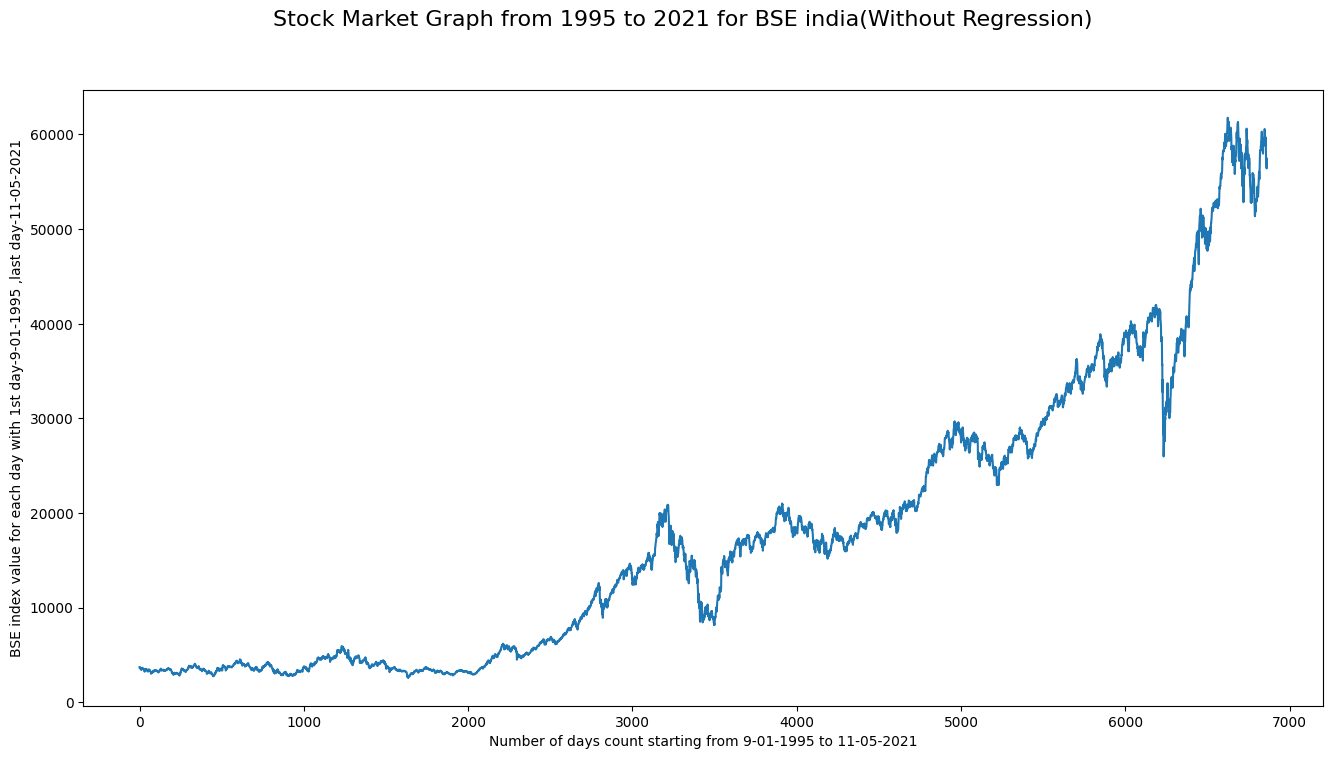

In [26]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
#plot the actual data
plt.figure(figsize=(16,8))
plt.plot(x,df['Close'],label='Close Price History')
plt.suptitle('Stock Market Graph from 1995 to 2021 for BSE india(Without Regression)', fontsize=16)
plt.xlabel("Number of days count starting from 9-01-1995 to 11-05-2021")
plt.ylabel("BSE index value for each day with 1st day-9-01-1995 ,last day-11-05-2021")



In [27]:
# Model initialization
# by default the degree of the equation is 1.
# Hence the mathematical model equation is y = mx + c, which is an equation of a line.
regression_model = LinearRegression()


In [28]:
# Fit the data(train the model)
regression_model.fit(x.reshape(-1, 1), y.reshape(-1, 1))

LinearRegression()

In [29]:

# Prediction for historical dates. Let's call it learned values.
y_learned = regression_model.predict(x.reshape(-1, 1))


In [30]:
# Now, add future dates to the date index and pass that index to the regression model for future prediction.
# As we have converted date index into a range index, hence, here we just need to add 3650 days ( roughly 10 yrs)
# to the previous index. x[-1] gives the last value of the series.
newindex = np.asarray(pd.RangeIndex(start=x[-1], stop=x[-1] + 1000))

In [31]:
future_x = newindex

In [32]:
# Prediction for future dates. Let's call it predicted values.
y_predict = regression_model.predict(newindex.reshape(-1, 1))

In [33]:
#print the last predicted value
print ("Closing price at 2024 would be around ", y_predict[-1])

Closing price at 2024 would be around  [48601.55789389]


In [34]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10


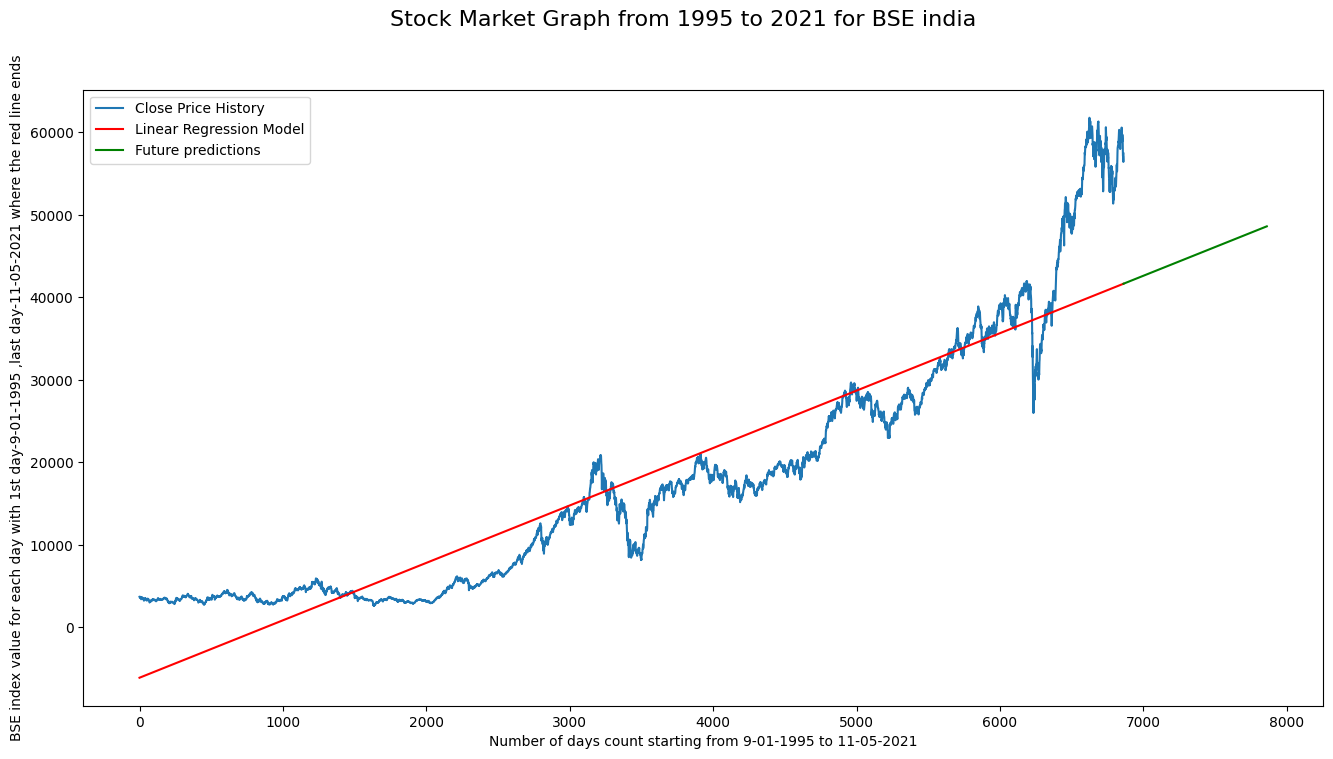

In [36]:
#plot the actual data
plt.figure(figsize=(16,8))
plt.plot(x,df['Close'], label='Close Price History')
#plot the regression model
plt.plot(x,y_learned, color='r', label='Linear Regression Model')
#plot the future predictions
plt.plot(future_x,y_predict, color='g', label='Future predictions')
plt.suptitle('Stock Market Graph from 1995 to 2021 for BSE india', fontsize=16)
plt.xlabel("Number of days count starting from 9-01-1995 to 11-05-2021")
plt.ylabel("BSE index value for each day with 1st day-9-01-1995 ,last day-11-05-2021 where the red line ends")
fig = plt.gcf()
#fig.canvas.set_window_title('Stock Market Graph from 1989 to 2021')
plt.legend()
plt.show()